<a href="https://colab.research.google.com/github/Thophile/Notebook/blob/master/MidJourney_Style_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Installation the required libraries

In [1]:
!pip install transformers diffusers accelerate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.1/219.1 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 28.2 MB/s eta 0:00:00


### Load the StableDiffusion Pipeline to use for Image Generation

In [2]:
from diffusers import StableDiffusionPipeline
import torch

### Define the Model Path - https://huggingface.co/prompthero/midjourney-v4-diffusion

In [3]:
model_path = 'prompthero/midjourney-v4-diffusion'

### Start Downloading the Fine-tuned Model (Took about 7 mins)

In [4]:
pipe = StableDiffusionPipeline.from_pretrained(model_path , torch_dtype=torch.float16)

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


### Move the Models to GPU if GPU is available 

In [5]:
!nvidia-smi

Sun May 14 18:54:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
if torch.cuda.is_available():
  pipe = pipe.to("cuda")

device = "GPU 🔥" if torch.cuda.is_available() else "CPU 🥶"

In [7]:
device

'GPU 🔥'

### Prompt

In [30]:
base_prompt = "a beautiful druid boy with yellow eyes holding a spear and a shield, full body. City background. posture by j scott campbell"  #@param {type:"string"}
#, perfect shading, soft studio lighting, ultra-realistic, photorealistic, octane render, cinematic lighting, hdr, in-frame, 4k, 8k, edge lighting
style = ' detailed, soft ambiance, japanese influence, unreal engine 5, octane render" + Remaster.' #@param {type:"string"}
prompt = "mdjrny-v4 style " + base_prompt + style

  0%|          | 0/50 [00:00<?, ?it/s]

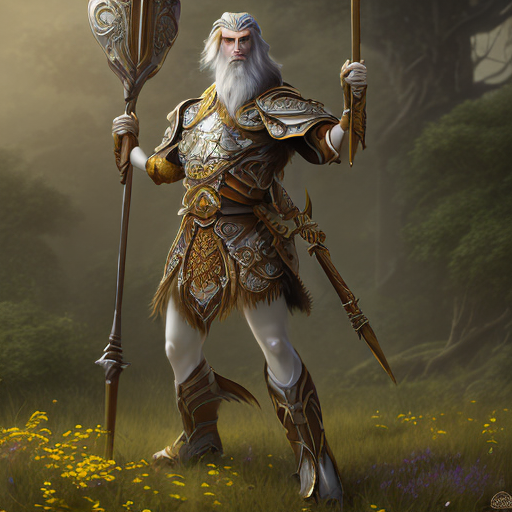

In [34]:
image = pipe(prompt, width = 512, height = 512).images[0]
image

In [33]:
image.save("sd_img.png")

"Woman in Kimono" + "detailed, soft ambiance, japanese influence, unreal engine 5, octane render" + Remaster.

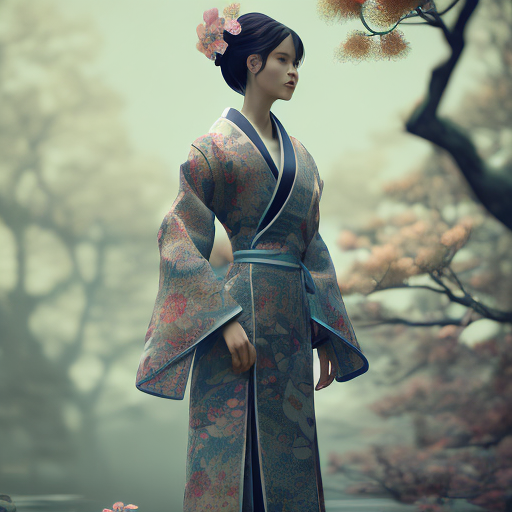

In [ ]:
image = result.images[0]  
    
image.save("sd_img.png")

image